## **Importing Liberaries & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/modyreturn/Health_Care_Analysis/refs/heads/master/merged_data.csv"

df = pd.read_csv(url)

df.head()


,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group
0,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
1,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
2,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,9-12 Months,1,Inpatient,Other
3,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other
4,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other


## **Cleaning The Data**

In [2]:
# converting Archive_Date to datetime
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df['Year'] = df['Archive_Date'].dt.year
df['Month_Name'] = df['Archive_Date'].dt.month_name()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452991 entries, 0 to 452990
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Archive_Date     452991 non-null  datetime64[ns]
 1   Specialty_HIPE   452800 non-null  float64       
 2   Specialty_Name   452991 non-null  object        
 3   Adult_Child      452991 non-null  object        
 4   Age_Profile      452816 non-null  object        
 5   Time_Bands       452989 non-null  object        
 6   Total            452991 non-null  int64         
 7   Case_Type        452991 non-null  object        
 8   Specialty Group  452991 non-null  object        
 9   Year             452991 non-null  int32         
 10  Month_Name       452991 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 36.3+ MB


In [3]:
df['Time_Bands'] = df['Time_Bands'].str.strip()
df['Age_Profile'] = df['Age_Profile'].str.strip()

In [4]:
# I will use the following func to format the values on axis of the charts as needed
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply formatter to the current plot
formatter = FuncFormatter(millions_formatter)

In [5]:
# here you can categorise and order Month_Name to plot
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## **Exploratory Data Analysis (EDA):**

### **Statistic Summary**

### **Age Profiling:**
-   Let's see the total of cases by age profile


In [6]:
df['Age_Profile'].unique()

array(['16-64', '65+', '0-15', nan], dtype=object)

In [7]:
age_df = df.groupby('Age_Profile')['Total'].sum().reset_index()
age_df

,Age_Profile,Total
0,0-15,3502498
1,16-64,15095747
2,65+,6039484


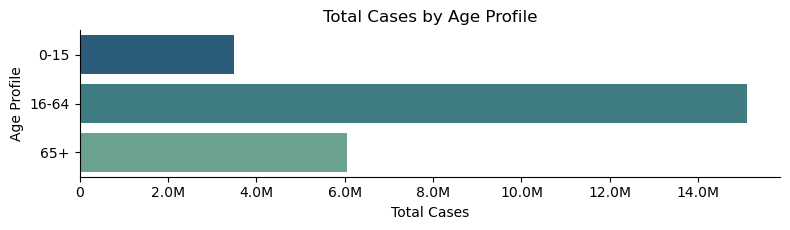

In [8]:
plt.figure(figsize=(8, 2.4))
sns.barplot(
    data=age_df,
    y='Age_Profile',
    x='Total',
    palette='crest_r'
)

# formatting the xaxis values
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Total Cases by Age Profile')
plt.xlabel('Total Cases')
plt.ylabel('Age Profile')

sns.despine()
plt.tight_layout()
plt.show()



**Overview**

This horizontal bar chart breaks down healthcare cases across three age groups:

- Age 16–64
    - Represents the **largest share**, with **over 15 million cases**.
    - Reflects the active working-age population, likely experiencing diverse healthcare needs: **occupational injuries, chronic conditions, elective surgeries**, and preventive care.

- Age 65+
    - Accounts for around **6 million cases**.
    - Indicative of an aging population with higher frequency of **chronic illnesses, surgeries, and specialist care** (e.g., cardiology, orthopedics).

- Age 0–15
    - The lowest volume at **under 4 million cases**.
    - Still a significant number, reflecting **pediatric care** needs such as vaccinations, respiratory conditions, and ENT issues.

---
